### MS – ASA 494 - Assignment – 1
### Regression Analysis

#### A - Life expectancy Data

In [1]:
import pyforest
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math

In [3]:
life = pd.read_csv("C:/Users/Akash/Desktop/Mayukh sir practical/assignment1/a1d1.csv")
life

<IPython.core.display.Javascript object>

,Country,Year,Status,Life.expectancy,GDP
0,Afghanistan,2015,Developing,65.0,584.259210
1,Albania,2015,Developing,77.8,3954.227830
2,Algeria,2015,Developing,75.6,4132.762920
3,Angola,2015,Developing,52.4,3695.793748
4,Antigua and Barbuda,2015,Developing,76.4,13566.954100
...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,NaN
179,Viet Nam,2015,Developing,76.0,NaN
180,Yemen,2015,Developing,65.7,NaN
181,Zambia,2015,Developing,61.8,1313.889646


In [4]:
le = life["Life.expectancy"]
gdp = life["GDP"]
print(gdp.min())
print(gdp.max())

33.681223
66346.52267


#### Q1 - Do any of the values look different from the rest? Fit a regression line of Life Expectancy on GDP and see if there are any influential points.

##### Checking for null

In [5]:
print(le.isnull().sum())
print(gdp.isnull().sum())

0
29


##### filling the nan values of gdp

In [6]:
life["GDP"]

new_gdp = [1171.08,3300.02,4581.46,3791.77,18803,629,3791.77,32936.66,2.02,137.82,38495.15,
 667.82,1439.04,2784.21,31.65,2172.35,147000,774.52,180.81,75.54,8846.76,120201.42188,
 1007.12,293000,4737.86,1824000,323595,19324.11,4244.51]

nans = life["GDP"].isna()
length = sum(nans)

life.loc[nans,"GDP"] = new_gdp

life["GDP"]

0         584.259210
1        3954.227830
2        4132.762920
3        3695.793748
4       13566.954100
           ...      
178    323595.000000
179     19324.110000
180      4244.510000
181      1313.889646
182       118.693830
Name: GDP, Length: 183, dtype: float64

In [7]:
dict1 = {"Life exp":le, "GDP":life["GDP"]}
data = pd.DataFrame(dict1)
data

<IPython.core.display.Javascript object>

,Life exp,GDP
0,65.0,584.259210
1,77.8,3954.227830
2,75.6,4132.762920
3,52.4,3695.793748
4,76.4,13566.954100
...,...,...
178,74.1,323595.000000
179,76.0,19324.110000
180,65.7,4244.510000
181,61.8,1313.889646


In [8]:
data["GDP"].isnull().sum()
data["Life exp"].isnull().sum()

0

##### checking irregular points in the data

<IPython.core.display.Javascript object>

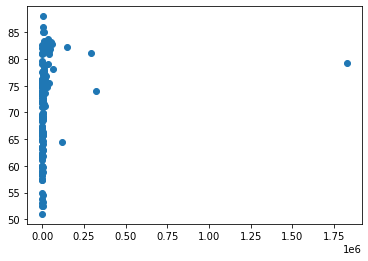

In [9]:
plt.scatter(data["GDP"],le)

<IPython.core.display.Javascript object>

The maximum value of le is = 88.0
The minimum value of le is = 51.0


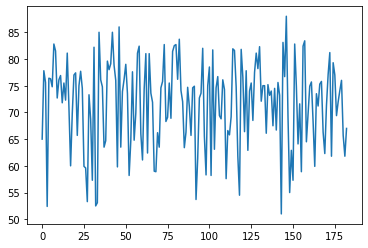

In [10]:
# LIFE EXPECTANCY

plt.plot(data["Life exp"])
print("The maximum value of le is =",data["Life exp"].max())
print("The minimum value of le is =",data["Life exp"].min())

<IPython.core.display.Javascript object>

The maximum value of gdp is = 1824000.0
The minimum value of gdp is = 2.02


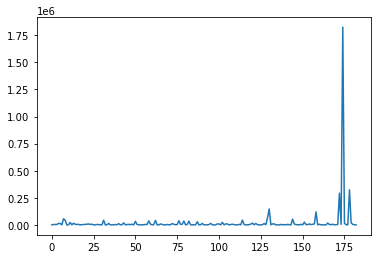

In [11]:
# GDP

plt.plot(data["GDP"])
print("The maximum value of gdp is =",data["GDP"].max())
print("The minimum value of gdp is =",data["GDP"].min())

In [12]:
Q1 = np.percentile(data["GDP"],25)
Q3 = np.percentile(data["GDP"],75)
print("Q1 of gdp is",Q1)
print("Q3 of gdp is",Q3)

iqr = (8576.523699-768.390609)

# removing all the datapoints that life outside the range (Q1 - 1.5*iqr) = r1,(Q3 + 1.5*iqr) = r2

r1 = (Q1 - (1.5*iqr))
r2 = (Q3 + (1.5*iqr))

print("The upper limit for our range is",r1)
print("The lower limit for our range is",r2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Q1 of gdp is 768.390609
Q3 of gdp is 8576.523699
The upper limit for our range is -10943.809025999999
The lower limit for our range is 20288.723334


In [13]:
l1 = []
l2 = []
for i in data["GDP"]:
    if r1<i<r2:
        l1.append(i)
    else:
        l2.append(i)
print("The suspected outliers are",l2)
print(len(l2))
# the values that we are going to keep -> l1

The suspected outliers are [56554.3876, 43665.947, 22688.87824, 43315.744, 32936.66, 36526.7711, 41176.88158, 38495.15, 35729.37253, 34474.13736, 28975.418, 23819.4636, 44292.88473, 66346.52267, 147000.0, 53629.73746, 25683.84565, 120201.42188, 293000.0, 1824000.0, 323595.0]
21


In [14]:
# DATASET WITHOUT THE IRREGUALR POINTS 
data1 = data[data["GDP"].isin(l1)]
data1

,Life exp,GDP
0,65.0,584.259210
1,77.8,3954.227830
2,75.6,4132.762920
3,52.4,3695.793748
4,76.4,13566.954100
...,...,...
177,72.0,285.834140
179,76.0,19324.110000
180,65.7,4244.510000
181,61.8,1313.889646


##### Simple linear regression 

##### original dataset without removing suspected irregular points

In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data["GDP"],data["Life exp"],test_size = 0.2, random_state = 3)

X = sm.add_constant(x_train1)
mod = sm.OLS(y_train1 , X)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life exp   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.992
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0858
Time:                        21:32:03   Log-Likelihood:                -505.22
No. Observations:                 146   AIC:                             1014.
Df Residuals:                     144   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.8839      0.650    109.061      0.000      69.599      72.169
GDP         7.183e-06   4.15e-06      1.730      0.086   -1.02e-06    1.54e-05
==============================================================================
Omnibus:                        6.166   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.066
Skew:                          -0.455   Prob(JB):                       0.0482
Kurtosis:                       2.589   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

163    70.887822
180    70.914350
71     70.900571
47     70.897239
17     70.889494
         ...    
21     70.930785
0      70.888060
131    70.889427
152    70.911480
106    70.884091
Length: 146, dtype: float64


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'GDP vd life expectancy (original data)')

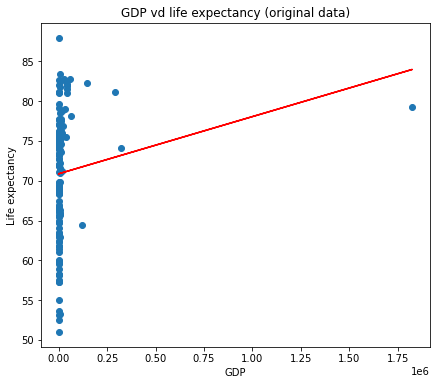

In [16]:
y_pred = result.predict(X)
print(y_pred)

fig = plt.figure(figsize = (6,5))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.scatter(x_train1,y_train1)
axes.plot(x_train1,y_pred,color = "red")
axes.set_xlabel("GDP")
axes.set_ylabel("Life expectancy")
axes.set_title("GDP vd life expectancy (original data)")

##### dataset after removing suspected irregular points

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1["GDP"],data1["Life exp"],test_size = 0.2, random_state = 3)

X = sm.add_constant(x_train1)
mod = sm.OLS(y_train1 , X)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life exp   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     26.29
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.07e-06
Time:                        21:32:06   Log-Likelihood:                -439.20
No. Observations:                 129   AIC:                             882.4
Df Residuals:                     127   BIC:                             888.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5329      0.863     78.270      0.000      65.826      69.240
GDP            0.0008      0.000      5.128      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.820   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.911
Skew:                          -0.104   Prob(JB):                        0.634
Kurtosis:                       2.644   Cond. No.                     7.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

15     70.869498
17     68.133291
27     71.041489
42     69.351831
143    67.982877
         ...    
24     72.888651
0      67.980366
147    69.005147
170    69.160032
119    73.242282
Length: 129, dtype: float64


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'GDP vd life expectancy (data without the suspected irregular points)')

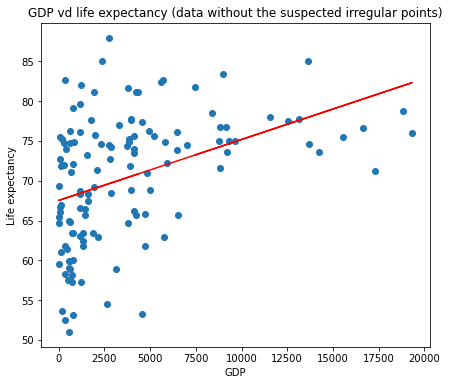

In [18]:
y_pred = result.predict(X)
print(y_pred)

fig = plt.figure(figsize = (6,5))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.scatter(x_train1,y_train1)
axes.plot(x_train1,y_pred,color = "red")
axes.set_xlabel("GDP")
axes.set_ylabel("Life expectancy")
axes.set_title("GDP vd life expectancy (data without the suspected irregular points)")

#### Q2 - Study Standardized and Studentized Residuals and comment.

##### done for the model fitted on the dataset after removing the irregular points

In [19]:
influence = result.get_influence()
levg = influence.hat_matrix_diag
levg
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_GDP,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,0.082929,0.015203,0.007761,1.399010,0.007868,0.124587,1.404355,0.125063
17,-0.119999,0.069444,0.007276,-1.114307,0.011583,-0.120629,-1.115377,-0.120745
27,-0.138626,-0.038143,0.023700,-2.426276,0.007988,-0.217716,-2.474741,-0.222065
42,0.186539,-0.064413,0.019932,2.140686,0.008624,0.199659,2.171784,0.202559
143,-0.261272,0.157072,0.033155,-2.327352,0.012094,-0.257507,-2.369246,-0.262142
...,...,...,...,...,...,...,...,...
24,0.005154,0.014255,0.000294,0.220799,0.011901,0.024233,0.219971,0.024142
0,-0.044911,0.027016,0.001022,-0.408434,0.012103,-0.045207,-0.407091,-0.045059
147,0.002445,-0.001034,0.000003,0.026665,0.009253,0.002577,0.026559,0.002567
170,0.026051,-0.010147,0.000387,0.292798,0.008951,0.027826,0.291742,0.027726


In [20]:
# OR

In [21]:
# Standardised Residual

influence = result.get_influence()
stand_res = influence.resid_studentized_internal
stand_res

# Studentised Residual

stud_res = result.outlier_test()    #or influence.resid_studentized_external
stud_res
sr = stud_res["student_resid"]

dict1 = {"Standardized residuals":stand_res , "Studentized residuals":sr}
pd.DataFrame(dict1)

<IPython.core.display.Javascript object>

,Standardized residuals,Studentized residuals
15,1.399010,1.404355
17,-1.114307,-1.115377
27,-2.426276,-2.474741
42,2.140686,2.171784
143,-2.327352,-2.369246
...,...,...
24,0.220799,0.219971
0,-0.408434,-0.407091
147,0.026665,0.026559
170,0.292798,0.291742


In [22]:
# removing all the stand. res values that life outside the range (Q1 - 1.5*iqr) = r1,(Q3 + 1.5*iqr) = r2

Q1 = np.percentile(stand_res,25)
Q3 = np.percentile(stand_res,75)
iqr = Q3-Q1

r1 = (Q1 - (1.5*iqr))
r2 = (Q3 + (1.5*iqr))

L1 = []
L2 = []
for i in stand_res:
    if r1<i<r2:
        L1.append(i)
    else:
        L2.append(i)
print("The values that are suspected to be irregular from the other standardised residuals are",L2)
print(len(L2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The values that are suspected to be irregular from the other standardised residuals are []
0


In [23]:
# removing all the stand. res values that life outside the interquartile range

L1 = []
L2 = []
for i in stand_res:
    if Q1<i<Q3:
        L1.append(i)
    else:
        L2.append(i)
#print("The values that are suspected to be irregular from the other standardised residuals are",L2)
#print(len(L2))

a2 = np.array(L2)
pd.DataFrame(a2,[np.arange(66)],["Suspected outliers"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Suspected outliers
0,1.399010
1,-1.114307
2,-2.426276
3,2.140686
4,-2.327352
...,...
61,-1.915067
62,0.923811
63,-1.509119
64,-1.365350


##### checking for presence of outliers from stud, stand residuals

##### plotting predicted y vs stud/stand res 

15     70.869498
17     68.133291
27     71.041489
42     69.351831
143    67.982877
         ...    
24     72.888651
0      67.980366
147    69.005147
170    69.160032
119    73.242282
Length: 129, dtype: float64


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Standardized Residuals')

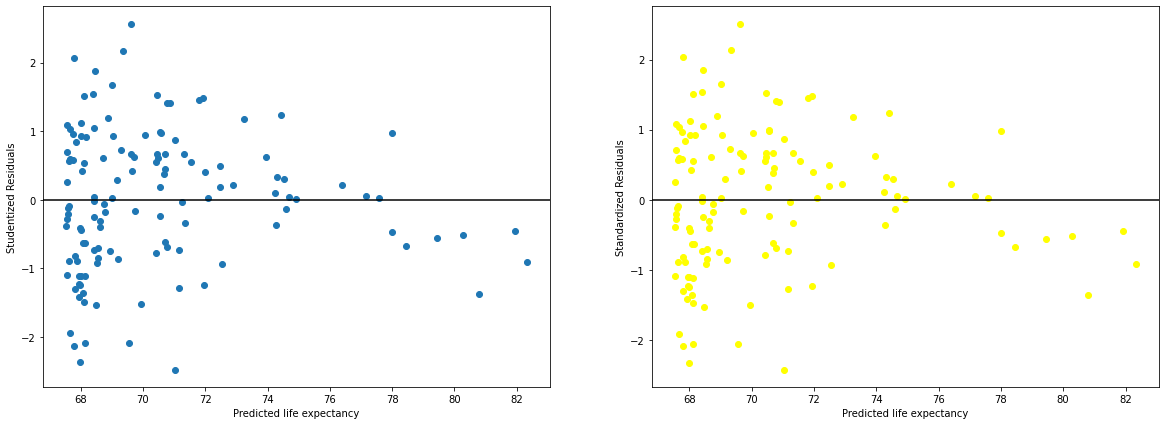

In [24]:
y_pred = result.predict(X)
print(y_pred)
sr
# scatterplot of predictor variable vs. studentized residuals
# scatterplot of predictor variable vs. standardized residuals

fig , axes = plt.subplots(figsize = (20,7), nrows = 1 , ncols = 2)
axes[0].scatter(y_pred, sr)
axes[1].scatter(y_pred, stand_res,color = "yellow")
axes[0].axhline(y=0, color='black')
axes[1].axhline(y=0, color='black')
axes[0].set_xlabel('Predicted life expectancy')
axes[1].set_xlabel('Predicted life expectancy')
axes[0].set_ylabel('Studentized Residuals') 
axes[1].set_ylabel('Standardized Residuals') 

#### Q3 - Obtain the DFBETAs and DFFITs. Also Calculate Cook’s distance and comment.

In [25]:
inf_sum.head()

,dfb_const,dfb_GDP,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,0.082929,0.015203,0.007761,1.399010,0.007868,0.124587,1.404355,0.125063
17,-0.119999,0.069444,0.007276,-1.114307,0.011583,-0.120629,-1.115377,-0.120745
27,-0.138626,-0.038143,0.023700,-2.426276,0.007988,-0.217716,-2.474741,-0.222065
42,0.186539,-0.064413,0.019932,2.140686,0.008624,0.199659,2.171784,0.202559
143,-0.261272,0.157072,0.033155,-2.327352,0.012094,-0.257507,-2.369246,-0.262142


In [26]:
# DFBETAS
dict3 = {"DFBETAS (before the ith element is removed)":inf_sum["dfb_const"] , "DFBETAS (after the ith element is removed)":inf_sum["dfb_GDP"]}
pd.DataFrame(dict3)

<IPython.core.display.Javascript object>

,DFBETAS (before the ith element is removed),DFBETAS (after the ith element is removed)
15,0.082929,0.015203
17,-0.119999,0.069444
27,-0.138626,-0.038143
42,0.186539,-0.064413
143,-0.261272,0.157072
...,...,...
24,0.005154,0.014255
0,-0.044911,0.027016
147,0.002445,-0.001034
170,0.026051,-0.010147


In [27]:
#OR

In [28]:
influence = result.get_influence()
dfbetas = influence.dfbetas
dffits = influence.dffits
cd = influence.cooks_distance

#print("DFBETAS (j,i)")
#print(dfbetas)
#print("DFFITS")
#print(dffits)
#print("COOK'S DISTANCE")
#print(cd)

In [29]:
levg = inf_sum["hat_diag"]

In [30]:
k = 1
n = 162

#high leverage points
cutoff_levg = (2*k)/n
l = pd.DataFrame(levg)
print("FINDING LEVERAGE POINTS")
print(l[l>cutoff_levg])
print('\n')

#influential points
#DFBETAS , DFFITS , COOK'S DISTANCE

print("FINDING INFLUENTIAL POINTS")
#DFBETAS
cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_GDP"])
dfb1 = pd.DataFrame(dfb)
print("DFBETAS")
print(dfb1[dfb1>cutoff_dfb])
print("\n")

#DFFITS
cutoff_dffits = 2*math.sqrt(k/n)
dff = inf_sum["dffits"]
print("DFFITS")
print(dff[dff>cutoff_dffits])
print("\n")

#COOK'S DISTANCE
cutoff_cooks = (inf_sum["cooks_d"].mean()*3)
c = abs(inf_sum["cooks_d"])
c1 =pd.DataFrame(c)
print("COOK'S DISTANCE")
print(c1[c1>cutoff_cooks])

<IPython.core.display.Javascript object>

FINDING LEVERAGE POINTS
     hat_diag
15        NaN
17        NaN
27        NaN
42        NaN
143       NaN
..        ...
24        NaN
0         NaN
147       NaN
170       NaN
119    0.0132

[129 rows x 1 columns]


FINDING INFLUENTIAL POINTS


<IPython.core.display.Javascript object>

DFBETAS
     dfb_GDP
15       NaN
17       NaN
27       NaN
42       NaN
143      NaN
..       ...
24       NaN
0        NaN
147      NaN
170      NaN
119      NaN

[129 rows x 1 columns]


DFFITS
42     0.202559
146    0.234237
39     0.160407
157    0.171249
34     0.219006
96     0.193991
128    0.161058
80     0.235161
41     0.164119
Name: dffits, dtype: float64




<IPython.core.display.Javascript object>

COOK'S DISTANCE
      cooks_d
15        NaN
17        NaN
27   0.023700
42        NaN
143  0.033155
..        ...
24        NaN
0         NaN
147       NaN
170       NaN
119       NaN

[129 rows x 1 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Studentized Residuals')

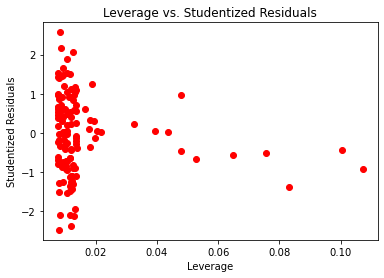

In [31]:
plt.scatter(levg,inf_sum["student_resid"],color = "red")
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

<IPython.core.display.Javascript object>

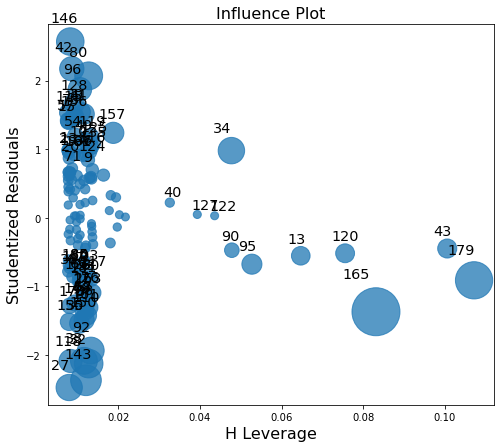

In [32]:
fig, ax = plt.subplots(figsize=(8,7))
fig = sm.graphics.influence_plot(result, ax= ax, criterion="cooks", alpha = 0.5)

#### B - Cloud Seeding Data

In [34]:
cs = pd.read_csv("C:/Users/Akash/Desktop/Mayukh sir practical/assignment1/a1d2.csv")
cs

<IPython.core.display.Javascript object>

,A,T,S,C,P,E,Y
0,0,0,1.75,13.4,0.274,0,2.55
1,1,3,4.10,3.9,0.198,0,1.83
2,0,4,2.35,5.3,0.526,1,1.80
3,1,6,4.25,7.1,0.250,1,0.89
4,0,9,1.60,6.9,0.018,0,1.28
5,0,25,3.35,4.9,0.194,1,1.51
6,0,27,2.85,12.1,0.751,1,1.84
7,1,28,2.20,5.2,0.084,1,1.62
8,1,29,4.40,4.1,0.236,1,1.01
9,1,32,3.10,2.8,0.214,1,1.39


In [35]:
A = cs["A"]
T = cs["T"]
S = cs["S"]
C = cs["C"]
P = cs["P"]
E = cs["E"]
Y = cs["Y"]
#
ind_var = cs.drop("Y",axis = 1)

##### multiple linear regression

In [36]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(ind_var,Y,test_size = 0.2, random_state = 3)

X = sm.add_constant(x_train2)
mod2 = sm.OLS(y_train2 , X)
result2 = mod2.fit()
result2.summary()

C:\Users\Akash\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3.963
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0321
Time:                        21:33:09   Log-Likelihood:                -7.8787
No. Observations:                  16   AIC:                             29.76
Df Residuals:                       9   BIC:                             35.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2930      0.705      3.251      0.010       0.697       3.889
A              0.6626      0.315      2.101      0.065      -0.051       1.376
T             -0.0108      0.007     -1.521      0.163      -0.027       0.005
S             -0.4523      0.200     -2.260      0.050      -0.905       0.000
C              0.0364      0.053      0.680      0.513      -0.085       0.157
P              1.8280      0.945      1.934      0.085      -0.310       3.966
E             -0.2405      0.450     -0.534      0.606      -1.259       0.778
==============================================================================
Omnibus:                        1.715   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.000
Skew:                           0.244   Prob(JB):                        0.606
Kurtosis:                       1.876   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Q1 - Check for any outliers in the data

In [37]:
influence2 = result2.get_influence()
inf_sum = influence2.summary_frame()
levg = inf_sum["hat_diag"]
inf_sum

,dfb_const,dfb_A,dfb_T,dfb_S,dfb_C,dfb_P,dfb_E,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
4,-0.956286,0.483508,0.341436,0.169160,0.248210,0.301398,0.499222,0.236196,-1.278321,0.502931,-1.285835,-1.332208,-1.340039
16,0.268378,1.208826,1.179061,0.498222,-0.522809,0.863783,-2.483663,1.013997,1.559290,0.744853,2.664204,1.720818,2.940191
6,0.062020,-0.125557,-0.235411,0.547382,-0.287353,-0.743622,-0.252140,0.242049,-1.226300,0.529787,-1.301668,-1.266839,-1.344699
7,-0.071935,-0.070661,0.016825,0.121911,-0.003838,0.017439,-0.094433,0.006314,-0.316657,0.305943,-0.210238,-0.300224,-0.199328
15,-0.034405,0.085445,-0.025407,-0.027747,0.063002,0.012990,0.005133,0.003091,-0.203709,0.342737,-0.147103,-0.192503,-0.139011
12,0.227278,0.489650,0.279522,-0.859937,0.265533,0.024758,0.552353,0.176407,1.395226,0.388134,1.111237,1.485908,1.183462
9,-0.037979,-0.041008,0.013468,0.022944,0.048021,-0.031889,0.002586,0.001012,-0.150144,0.239040,-0.084151,-0.141734,-0.079438
11,0.101427,0.092765,-0.023194,-0.080130,-0.095139,0.029317,0.033741,0.007377,0.446677,0.205605,0.227244,0.425878,0.216663
19,1.116470,-0.283962,-1.153809,-0.284451,-1.092408,0.577704,-0.297059,0.426798,-1.388849,0.607667,-1.728463,-1.477258,-1.838491
18,-0.265065,0.530936,-0.452040,0.163154,0.226122,0.165762,-0.141332,0.117576,-1.057625,0.423893,-0.907212,-1.065551,-0.914011


##### plotting predicted y vs stud/stand res 

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Standardized Residuals')

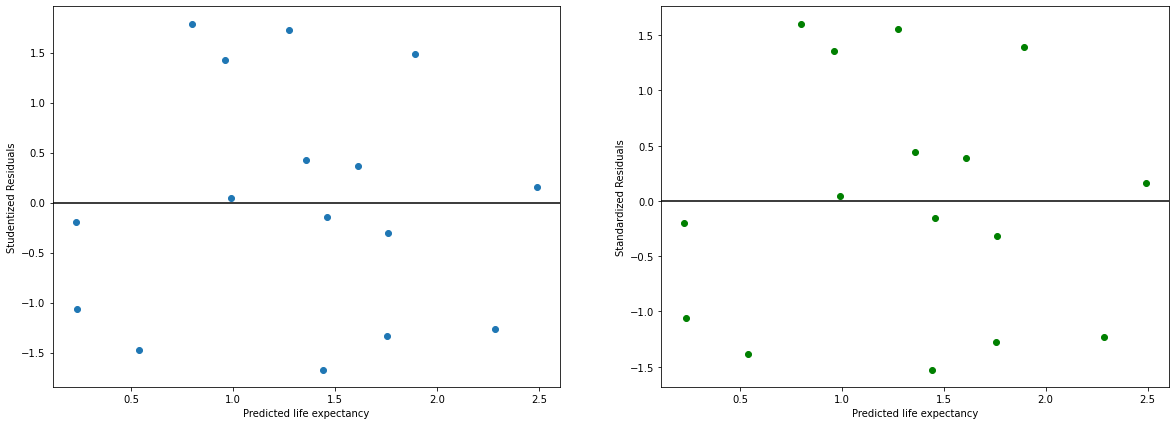

In [42]:
y_pred2 = result2.predict(X)

# scatterplot of predictor variable vs. studentized residuals and standardized residuals

fig , axes = plt.subplots(figsize = (20,7), nrows = 1 , ncols = 2)
axes[0].scatter(y_pred2, inf_sum["student_resid"])
axes[1].scatter(y_pred2, inf_sum["standard_resid"],color = "green")
axes[0].axhline(y=0, color='black')
axes[1].axhline(y=0, color='black')
axes[0].set_xlabel('Predicted life expectancy')
axes[1].set_xlabel('Predicted life expectancy')
axes[0].set_ylabel('Studentized Residuals') 
axes[1].set_ylabel('Standardized Residuals') 

In [43]:
#outliers                           
sr = abs(inf_sum["standard_resid"])

Q1 = np.percentile(sr,25)
Q3 = np.percentile(sr,75)
iqr = Q3-Q1

L1 = []
L2 = []
for i in sr:
    if Q1<i<Q3:
        L1.append(i)
    else:
        L2.append(i)

a2 = np.array(L2)
pd.DataFrame(a2,[np.arange(8)],["Suspected outliers"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Suspected outliers
0,1.559290
1,0.203709
2,1.395226
3,0.150144
4,1.604007
5,0.164276
6,0.043122
7,1.524800


In [44]:
k = 6
n = 20

#high leverage points
cutoff_levg = (2*k)/n
l = pd.DataFrame(levg)
print("FINDING LEVERAGE POINTS")
print(l[l>cutoff_levg])

<IPython.core.display.Javascript object>

FINDING LEVERAGE POINTS
    hat_diag
4        NaN
16  0.744853
6        NaN
7        NaN
15       NaN
12       NaN
9        NaN
11       NaN
19  0.607667
18       NaN
13       NaN
5        NaN
0        NaN
8        NaN
3        NaN
10       NaN


In [45]:
#influential points
#DFBETAS , DFFITS , COOK'S DISTANCE

#DFBETAS
cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_A"])
dfb1 = pd.DataFrame(dfb)
print("FINDING INFLUENTIAL POINTS")
print(dfb1[dfb1>cutoff_dfb])
print("\n")

cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_T"])
dfb1 = pd.DataFrame(dfb)
print(dfb1[dfb1>cutoff_dfb])
print("\n")

cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_S"])
dfb1 = pd.DataFrame(dfb)
print(dfb1[dfb1>cutoff_dfb])
print("\n")

cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_C"])
dfb1 = pd.DataFrame(dfb)
print(dfb1[dfb1>cutoff_dfb])
print("\n")

cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_P"])
dfb1 = pd.DataFrame(dfb)
print(dfb1[dfb1>cutoff_dfb])
print("\n")

cutoff_dfb = (2/(math.sqrt(n)))
dfb = abs(inf_sum["dfb_E"])
dfb1 = pd.DataFrame(dfb)
print(dfb1[dfb1>cutoff_dfb])
print("\n")

<IPython.core.display.Javascript object>

FINDING INFLUENTIAL POINTS
       dfb_A
4   0.483508
16  1.208826
6        NaN
7        NaN
15       NaN
12  0.489650
9        NaN
11       NaN
19       NaN
18  0.530936
13  0.583881
5   0.854510
0        NaN
8        NaN
3        NaN
10       NaN




<IPython.core.display.Javascript object>

       dfb_T
4        NaN
16  1.179061
6        NaN
7        NaN
15       NaN
12       NaN
9        NaN
11       NaN
19  1.153809
18  0.452040
13       NaN
5   0.515613
0        NaN
8        NaN
3   1.290498
10       NaN




<IPython.core.display.Javascript object>

       dfb_S
4        NaN
16  0.498222
6   0.547382
7        NaN
15       NaN
12  0.859937
9        NaN
11       NaN
19       NaN
18       NaN
13  0.588502
5        NaN
0        NaN
8        NaN
3   1.120048
10       NaN




<IPython.core.display.Javascript object>

       dfb_C
4        NaN
16  0.522809
6        NaN
7        NaN
15       NaN
12       NaN
9        NaN
11       NaN
19  1.092408
18       NaN
13  0.941349
5        NaN
0        NaN
8        NaN
3        NaN
10       NaN




<IPython.core.display.Javascript object>

       dfb_P
4        NaN
16  0.863783
6   0.743622
7        NaN
15       NaN
12       NaN
9        NaN
11       NaN
19  0.577704
18       NaN
13  0.604894
5   0.613766
0        NaN
8        NaN
3   0.497923
10       NaN




<IPython.core.display.Javascript object>

       dfb_E
4   0.499222
16  2.483663
6        NaN
7        NaN
15       NaN
12  0.552353
9        NaN
11       NaN
19       NaN
18       NaN
13  0.469733
5        NaN
0        NaN
8        NaN
3        NaN
10       NaN




In [46]:
#DFFITS
cutoff_dffits = 2* math.sqrt(k/n)
dff = inf_sum["dffits"]
print(dff[dff>cutoff_dffits])
print("\n")

#COOK'S DISTANCE
cutoff_cooks = (inf_sum["cooks_d"].mean()*3)
c = abs(inf_sum["cooks_d"])
c1 =pd.DataFrame(c)
print(c1[c1>cutoff_cooks])

16    2.940191
12    1.183462
13    1.283542
5     1.159032
Name: dffits, dtype: float64




<IPython.core.display.Javascript object>

     cooks_d
4        NaN
16  1.013997
6        NaN
7        NaN
15       NaN
12       NaN
9        NaN
11       NaN
19       NaN
18       NaN
13       NaN
5        NaN
0        NaN
8        NaN
3        NaN
10       NaN


##### regression plot to check for outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model E vs Y')

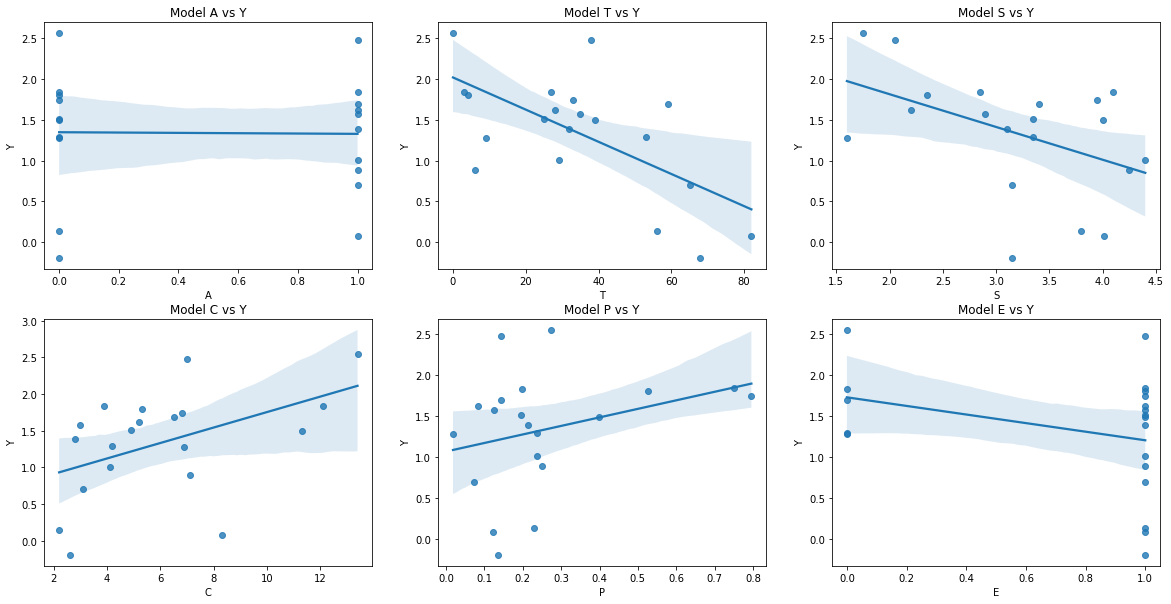

In [47]:
y_pred2 = result2.predict(X)

fig, axs = plt.subplots(2,3, figsize=(20,10))

sns.regplot(x=A, y=Y, data=cs, ax=axs[0][0])
axs[0][0].set_title("Model A vs Y")

sns.regplot(x=T, y=Y, data=cs, ax=axs[0][1])
axs[0][1].set_title("Model T vs Y")

sns.regplot(x=S, y=Y, data=cs, ax=axs[0][2])
axs[0][2].set_title("Model S vs Y")

sns.regplot(x=C, y=Y, data=cs, ax=axs[1][0])
axs[1][0].set_title("Model C vs Y")

sns.regplot(x=P, y=Y, data=cs, ax=axs[1][1])
axs[1][1].set_title("Model P vs Y")

sns.regplot(x=E, y=Y, data=cs, ax=axs[1][2])
axs[1][2].set_title("Model E vs Y")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Studentized Residuals')

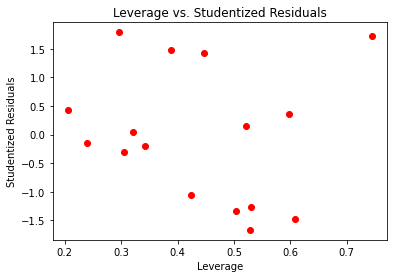

In [48]:
plt.scatter(levg,inf_sum["student_resid"],color = "red")
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

<IPython.core.display.Javascript object>

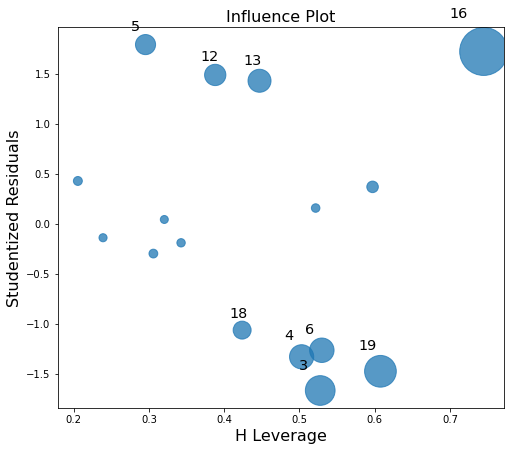

In [49]:
fig, ax = plt.subplots(figsize=(8,7))
fig = sm.graphics.influence_plot(result2, ax= ax, criterion="cooks", alpha = 0.5)